A [bakery](https://en.wikipedia.org/wiki/Bakery) is an establishment that produces and sells flour-based food baked in an oven such as bread, cookies, cakes, pastries, and pies. Some retail bakeries are also categorized as cafés, serving coffee and tea to customers who wish to consume the baked goods on the premises. Confectionery items are also made in most bakeries throughout the world.

For a dessert lover, the bakery is one of their favorite places to visit. Inside the bakery, of course, many types of desserts were sold but not all were sold as expected. So, in this notebook, We will load, clea, and explore then seek insights in the data to design a bakery sales strategy using Python. 

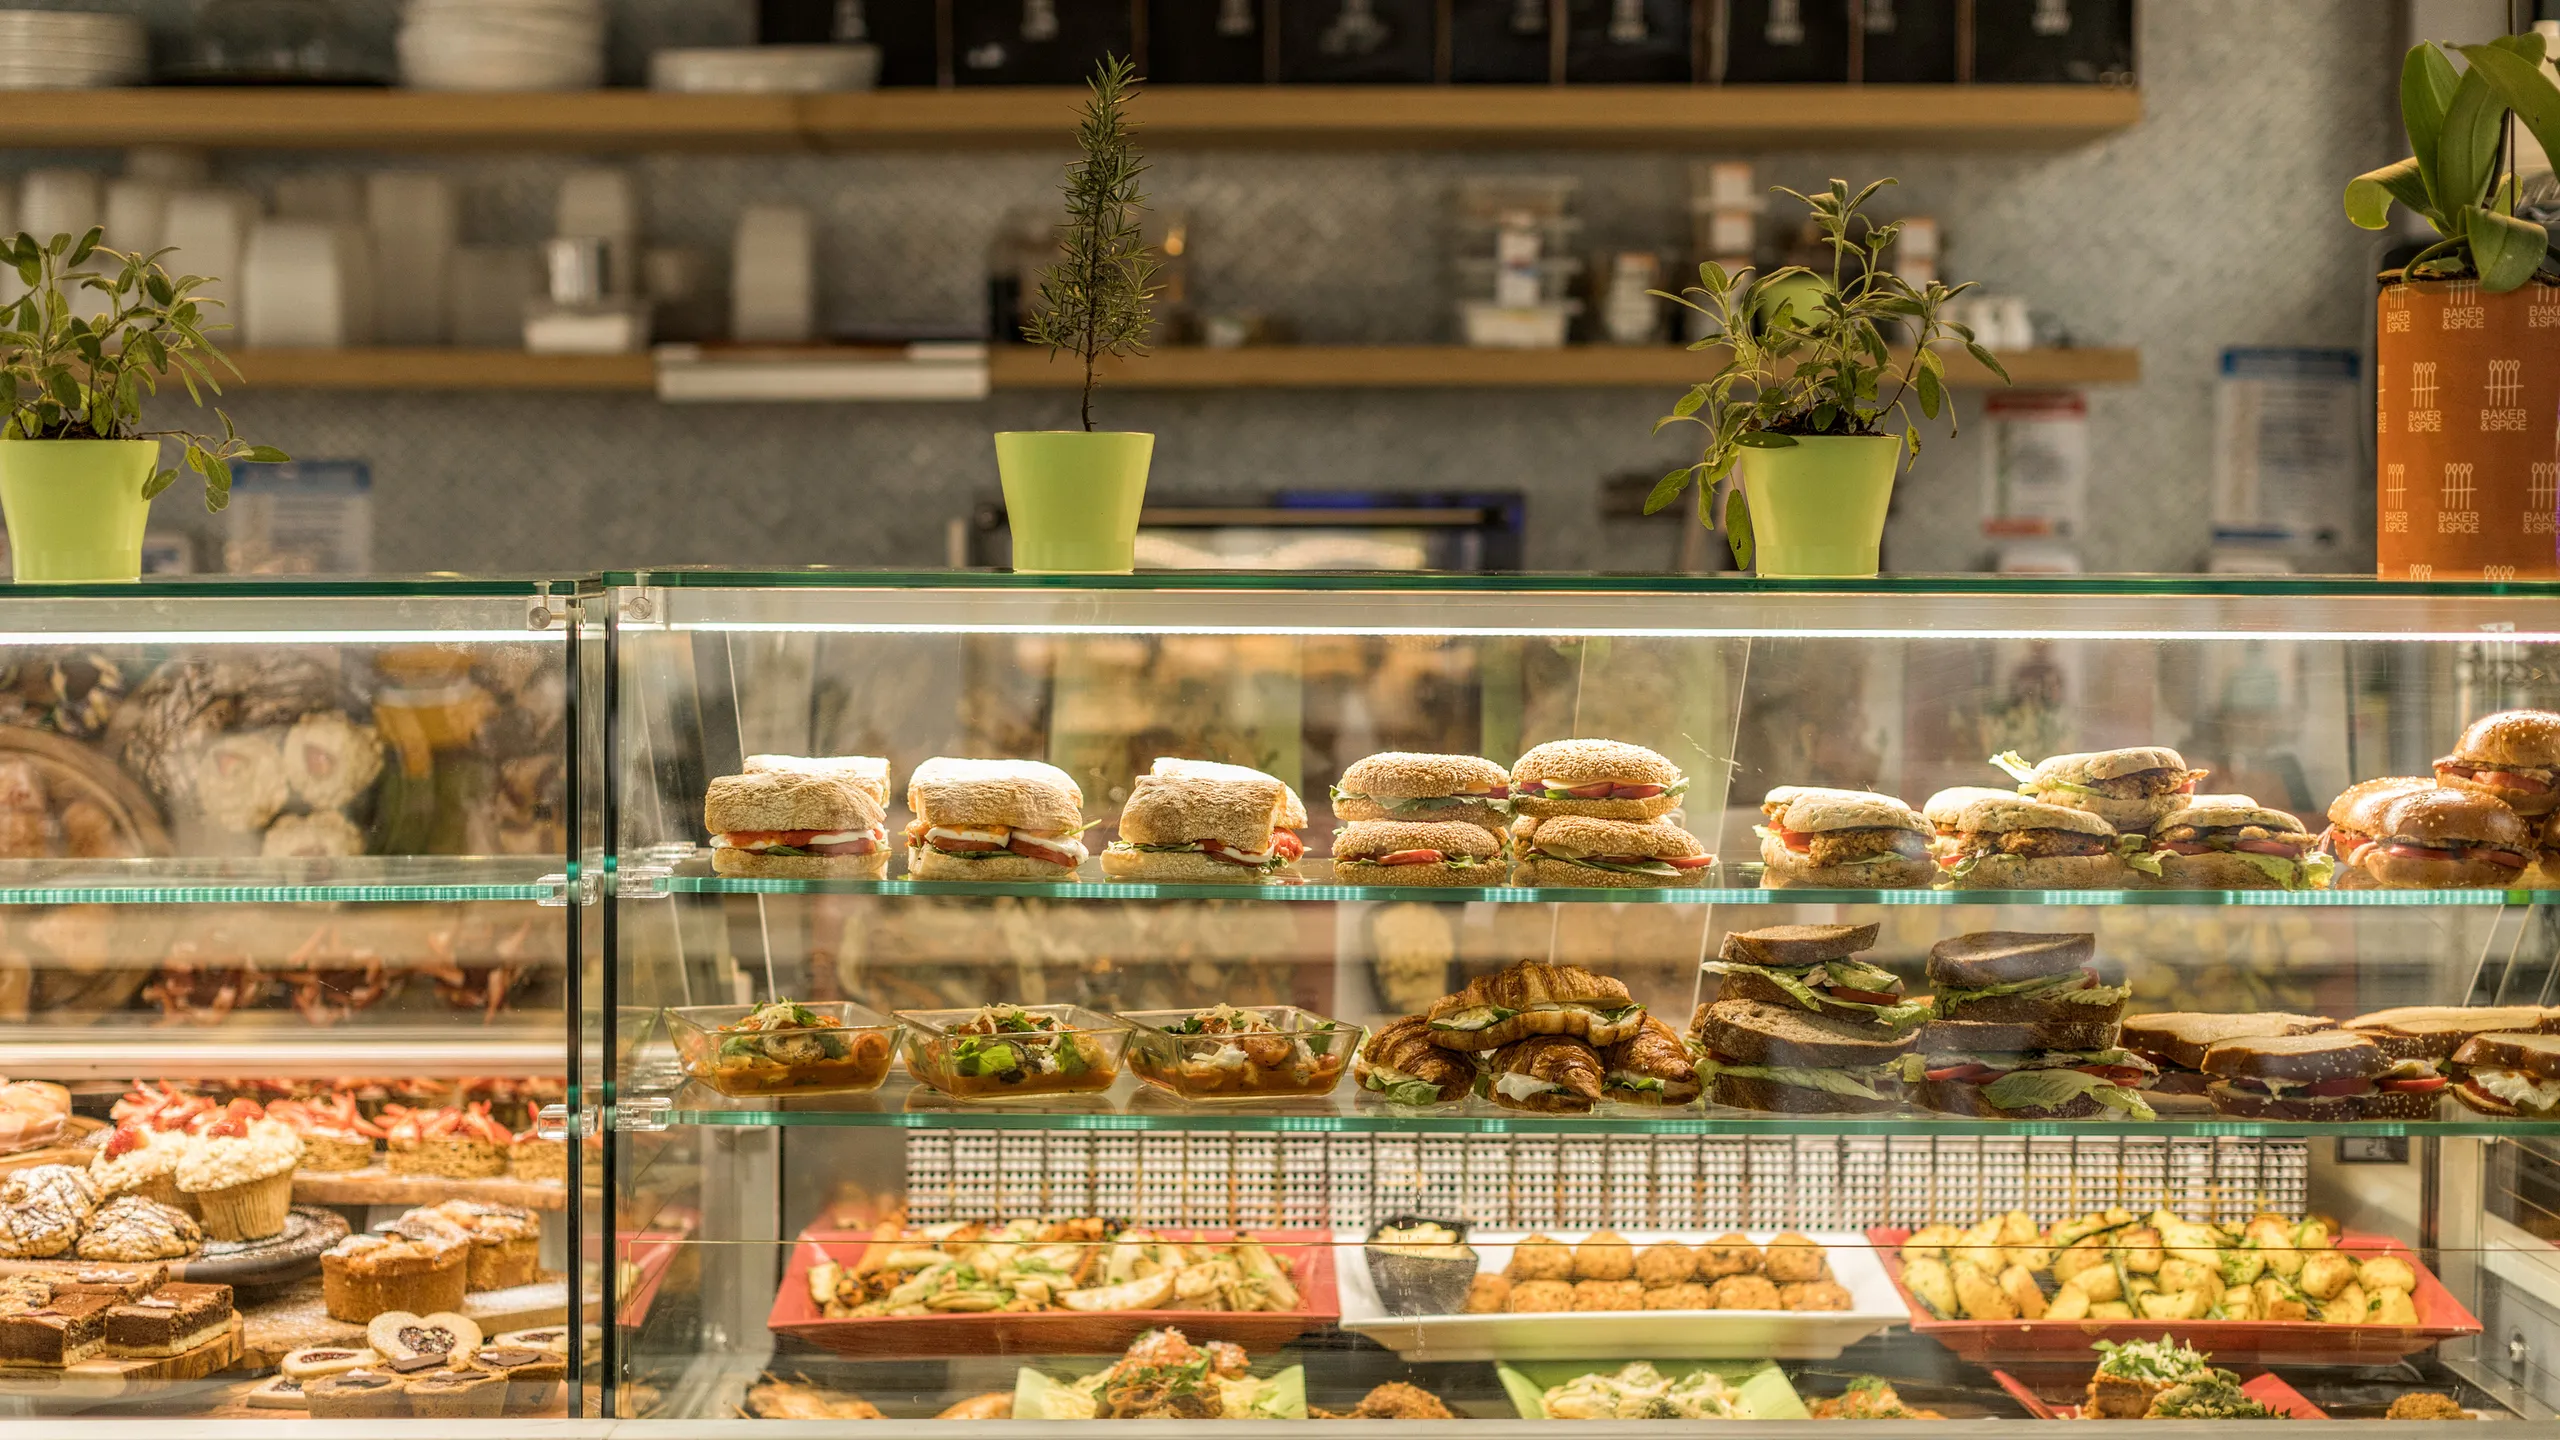
[Dukkan Al Manzil bakery](https://www.cntraveler.com/restaurants/dubai/baker-and-spice).

The data used is bakery sales data in Edinburg starting from 30–10–2016 to 09–04–2017. It downloaded from [Kaggle](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery). Unfortunately, the existing data is not too much so it is not possible to do further exploration. The EDA that will be carried out on this project is as follows:
- Which products are the top 10 best-selling and lowest of all time and each month?
- How was the sales in each session (morning, afternoon, evening and night)?
- How was the sales on weekdays and weekends?



# Import Library 

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data and Data Cleansing

In [14]:
df = pd.read_csv('BreadBasket_DMS.csv')
df.head(3)

Date      Time  Transaction          Item
0  2016-10-30  09:58:11            1         Bread
1  2016-10-30  10:05:34            2  Scandinavian
2  2016-10-30  10:05:34            2  Scandinavian

## General Information and missing value

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


The bakery sales dataset has 21293 rows. it contains four variables: Date, Time, Transaction ID and Item. Each coloumn has not any missing value, with information as below.

- Date: Categorical variable about the date of the transactions (YYYY-MM-DD format). The column starts from 30/10/2016 to 09/04/2017.
<br>
- Time: Categorical variable about the time of the transactions (HH:MM:SS format).
<br>
- Transaction: Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction. In other words, 1 person has more than 1 item.
<br>
- Item: Categorical variable with the products.

In [16]:
#check item unique
df['Item'].value_counts().head(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

There are 786 NONE items, what is it?

In [17]:
df[df['Item']=='NONE'].sample(3)

Date      Time  Transaction  Item
9247  2017-01-09  09:40:09         4411  NONE
980   2016-11-04  11:25:41          479  NONE
6394  2016-12-12  14:02:55         3054  NONE

In [18]:
df[df['Transaction']==2183]

Date      Time  Transaction            Item
4596  2016-11-27  11:25:50         2183       Medialuna
4597  2016-11-27  11:25:50         2183  Jammie Dodgers
4598  2016-11-27  11:25:50         2183             Tea
4599  2016-11-27  11:25:50         2183   Hot chocolate
4600  2016-11-27  11:25:50         2183            NONE
4601  2016-11-27  11:25:50         2183          Muffin

The 'NONE' item could be canceled orders or errors. Then this item will be deleted.

In [19]:
df=df[df['Item']!='NONE']
df[df['Item']=='NONE']

Empty DataFrame
Columns: [Date, Time, Transaction, Item]
Index: []

In [20]:
df['Item'].value_counts().tail(10)

Chimichurri Oil    2
Siblings           2
Chicken sand       1
The BART           1
Adjustment         1
Bacon              1
Gift voucher       1
Olum & polenta     1
Raw bars           1
Polenta            1
Name: Item, dtype: int64

There is 1 item 'Adjustment'. It will be deleted for the same reason.

In [21]:
df=df[df['Item']!='Adjustment']
df[df['Item']=='Adjustment']

Empty DataFrame
Columns: [Date, Time, Transaction, Item]
Index: []

## CHECK DUPLICATE

In [22]:
# number of duplicated data
df.duplicated().sum()

1620

In [23]:
# sample duplicated rows
df[df.duplicated(keep=False)].sort_values('Transaction').head(6)

Date      Time  Transaction          Item
1   2016-10-30  10:05:34            2  Scandinavian
2   2016-10-30  10:05:34            2  Scandinavian
23  2016-10-30  10:27:21           11         Bread
25  2016-10-30  10:27:21           11         Bread
51  2016-10-30  10:49:29           21        Coffee
52  2016-10-30  10:49:29           21        Coffee

The duplicate means the customer buy more than one same item. So it will not be drop.

# Analysis Data

## 10 top best and lowest-selling product all of time

In [24]:
#check the 10 highest selling items
df['Item'].value_counts().sort_values(ascending=False)[:10].to_frame()

Item
Coffee         5471
Bread          3325
Tea            1435
Cake           1025
Pastry          856
Sandwich        771
Medialuna       616
Hot chocolate   590
Cookies         540
Brownie         379

The best selling item is Coffee with total sales of 5471 and followed by Bread, Tea, Cake, Pastry, Sandwich, Medialuna, Hot chocolate, Cookie, and Brownie. 

In [25]:
#check the 10 lowest selling items
df['Item'].value_counts().sort_values(ascending=True)[:10].to_frame()

Item
Raw bars            1
Chicken sand        1
The BART            1
Olum & polenta      1
Bacon               1
Gift voucher        1
Polenta             1
Spread              2
Siblings            2
Chimichurri Oil     2

Some items are sold only once during sales. It is Raw bars, Chicken sand, The BART, Olum & polenta, Bacon, Gift voucher, and Polenta. Some of the least sold during sales are non-pastry items. It is certainly not suitable for sale in bakeries.

## The 10 top and bottom selling products each month

### Add a column of dates, months, and days

In [26]:
#Add Date_of_month coloumn 
df['Date'] = pd.to_datetime(df['Date'])
df['Date_of_month'] = df['Date'].dt.day


In [27]:
#Add Month coloumn 
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

In [28]:
#Add Day_name coloumn 
df['Day_name'] = df['Date'].dt.day_name()

In [18]:
df

Date      Time  Transaction           Item  Date_of_month  Month  \
0     2016-10-30  09:58:11            1          Bread             30     10   
1     2016-10-30  10:05:34            2   Scandinavian             30     10   
2     2016-10-30  10:05:34            2   Scandinavian             30     10   
3     2016-10-30  10:07:57            3  Hot chocolate             30     10   
4     2016-10-30  10:07:57            3            Jam             30     10   
...          ...       ...          ...            ...            ...    ...   
21288 2017-04-09  14:32:58         9682         Coffee              9      4   
21289 2017-04-09  14:32:58         9682            Tea              9      4   
21290 2017-04-09  14:57:06         9683         Coffee              9      4   
21291 2017-04-09  14:57:06         9683         Pastry              9      4   
21292 2017-04-09  15:04:24         9684      Smoothies              9      4   

      Day_name  
0       Sunday  
1       Sunday  
2       Sunday  
3       Sunday  
4       Sunday  
...        ...  
21288   Sunday  
21289   Sunday  
21290   Sunday  
21291   Sunday  
21292   Sunday  

[20506 rows x 7 columns]

In [29]:
#Dictionary to map month
m = {10 : '10 (October)', 11 :'11 (November)', 12 :'12 (Desember)',1:'01 (January)',2:'02 (February)',3:'03 (March)',4:'04 (April)'}

b = df['Month']
df['Month_str'] = b.map(m)

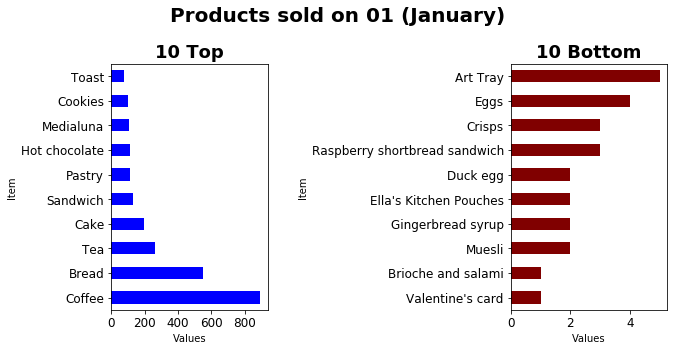

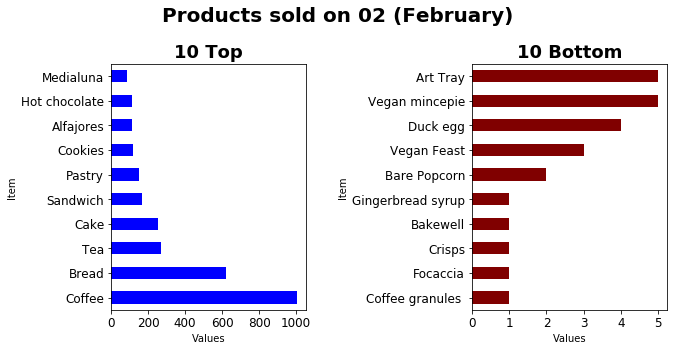

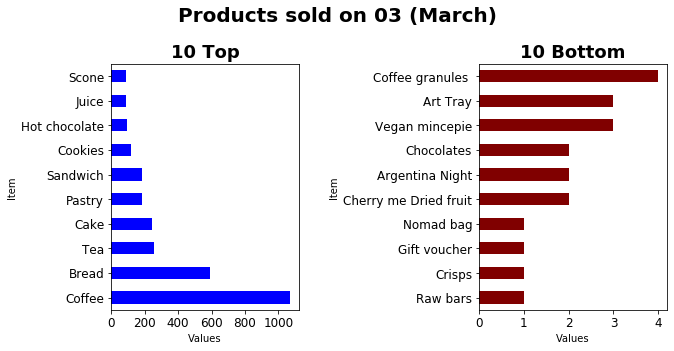

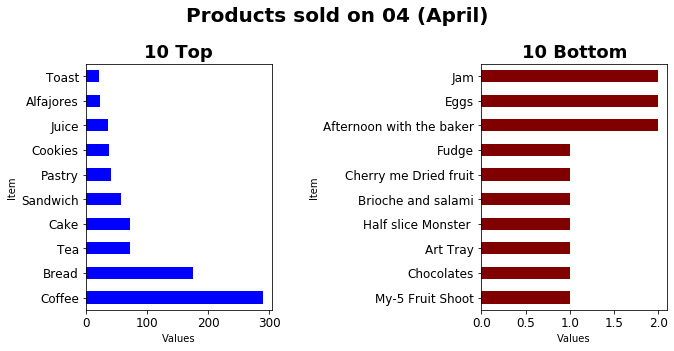

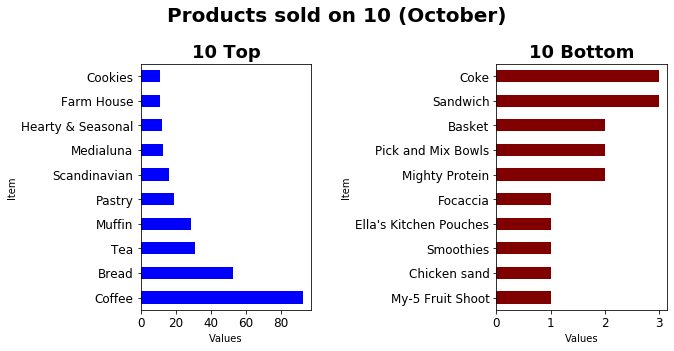

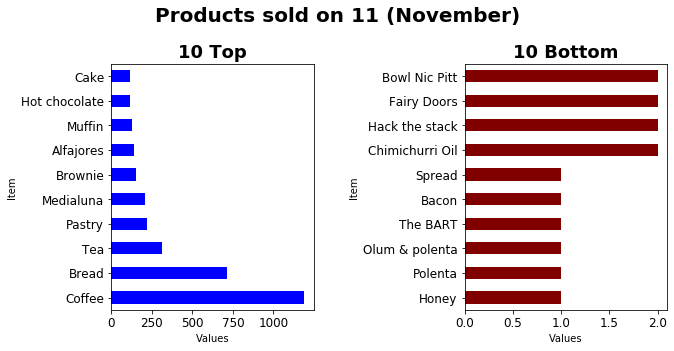

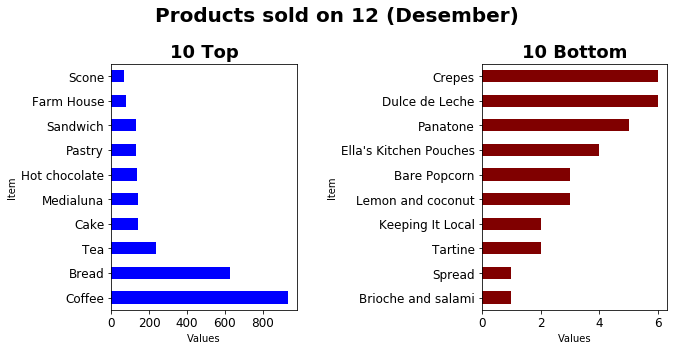

In [30]:
set_month = list(set(df['Month_str']))
sort_month = sorted(set_month)
for i in range (len (sort_month)):
    month=df[df['Month_str']==sort_month[i]]
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.suptitle("Products sold on " + str(sort_month[i]), fontsize=20, fontweight='bold',y=1.02)
    month['Item'].value_counts()[:10].plot(kind='barh',fontsize=12, ax=ax[0],color ='blue')
    month['Item'].value_counts(ascending=True)[:10].plot(kind='barh',fontsize=12, ax=ax[1],color ='maroon')
    ax[0].set_title('10 Top', fontsize=18, fontweight='bold')
    ax[1].set_title('10 Bottom', fontsize=18, fontweight='bold')
    ax[0].set(xlabel="Values", ylabel = "Item")
    ax[1].set(xlabel="Values", ylabel = "Item")
    fig.tight_layout(pad=3, h_pad=3.0)
    

Coffee is always the best selling product and followed by Bread and Tea in every month. Preferably for some products in the bottom 10 position which only sold 1 or 2 times, there is no need to sell these products especially if the product has a short expiration date. Or can be sold with a preorder system.

## How was the sales on each session (morning, afternoon, evening, and night)?

In [31]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

### Add a column of section

In [32]:
def section(hour):
    if hour >= 7 and hour<11:
        section = 'Morning'
    elif hour >= 11 and hour<=14:
        section = 'Afternoon'
    elif hour  >= 15 and hour<=18:
        section = 'Evening'
    else:
        section = 'Night'
        
    return section

df['Section'] = df['Hour'].apply(section)
df.sample(3)

Date                Time  Transaction      Item  Date_of_month  \
13230 2017-02-08 2022-01-24 13:14:53         6225  Sandwich              8   
7966  2016-12-24 2022-01-24 12:56:35         3821  Sandwich             24   
14880 2017-02-19 2022-01-24 13:58:27         6874    Coffee             19   

       Month   Day_name      Month_str  Hour    Section  
13230      2  Wednesday  02 (February)    13  Afternoon  
7966      12   Saturday  12 (Desember)    12  Afternoon  
14880      2     Sunday  02 (February)    13  Afternoon

### Check transaction hourly

In [33]:
df['Hour'].value_counts()

11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      47
7       24
20      22
22       8
21       3
23       3
1        1
Name: Hour, dtype: int64

One-time transaction was detected at 1 a.m. This could be a transaction outside the bakery's operating hours. So let's check it.

In [34]:
df[df['Hour']==1]

Date                Time  Transaction   Item  Date_of_month  Month  \
8561 2017-01-01 2022-01-24 01:21:05         4090  Bread              1      1   

     Day_name     Month_str  Hour Section  
8561   Sunday  01 (January)     1   Night

It turns out that the transaction at 01:21:05 a.m occurred on January 1, 2017. Now let's check the transactions on that date.

In [35]:
df[(df['Date_of_month']==1) & (df['Month']==1)]

Date                Time  Transaction   Item  Date_of_month  Month  \
8561 2017-01-01 2022-01-24 01:21:05         4090  Bread              1      1   

     Day_name     Month_str  Hour Section  
8561   Sunday  01 (January)     1   Night

It's solved, why there is one transaction at 01:21:05 a.m on 1st January. The transaction was carried out by bakery employee after the New Year party was over, and on that date, the bakery was closed.

In [42]:
df1 = pd.DataFrame({'Hour':[1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                    'Transaction' : [1,24,645,1966,2666,3102,2854,2617,2640,2115,1343,368,82,47,22,3,8,3]
                  })

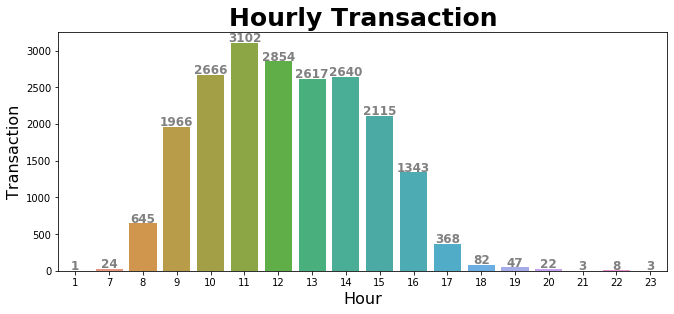

In [44]:
fig, ax = plt.subplots(figsize=(10,5))

g = sns.barplot(x = 'Hour',y='Transaction',data=df1,ax=ax)

x = np.arange(len(df['Hour']))
y = df1['Transaction']

for i, v in enumerate(y):
    ax.text(x[i], v+15, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')

ax.set_title('Hourly Transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Hour', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

The most transactions is at 10 a.m - 12 p.m, with a peak at 11 a.m with as many transactions as 3102.

### Check transaction sectionly

In [45]:
df['Section'].value_counts()

Afternoon    11213
Morning       5301
Evening       3908
Night           84
Name: Section, dtype: int64

In [46]:
df2 = pd.DataFrame({'Section':['Morning','Afternoon','Evening','Night'],
                    'Transaction' : [5301,11213,3909,84]
                  })

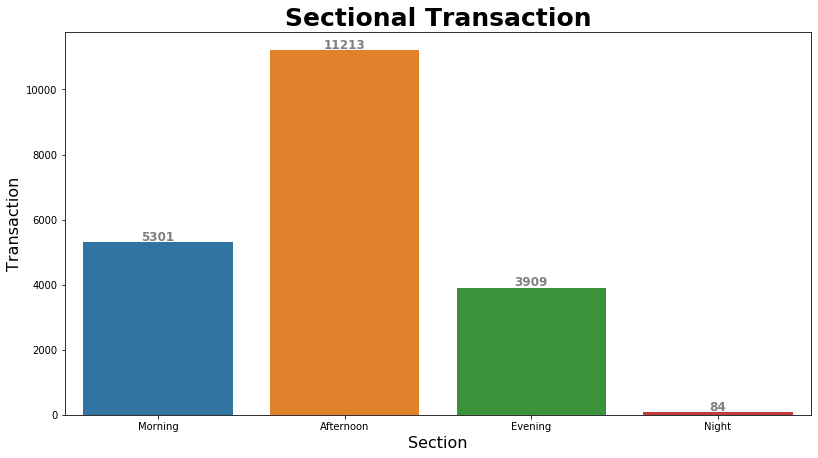

In [48]:
fig, ax = plt.subplots(figsize=(12,7))

g = sns.barplot(x = 'Section',y='Transaction',data=df2,ax=ax)

x = np.arange(len(df['Section']))
y = df2['Transaction']

for i, v in enumerate(y):
    ax.text(x[i], v+50, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')

ax.set_title('Sectional Transaction', fontsize=25, fontweight='bold')
ax.set_xlabel('Section', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

### Check top best seller item on each section

In [56]:
set_section = list(set(df['Section']))
set_section

['Night', 'Morning', 'Afternoon', 'Evening']

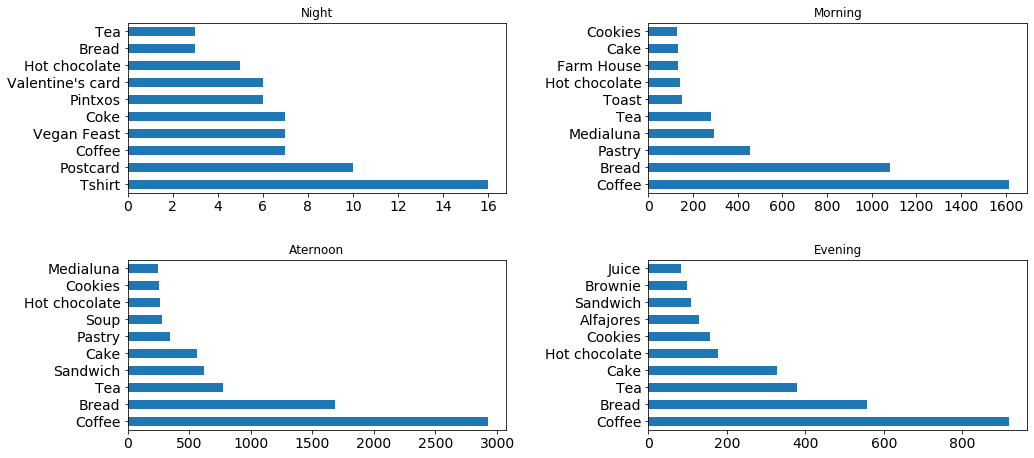

In [57]:
set_section = list(set(df['Section']))
section=df[df['Section']==set_section[0]]
section1=df[df['Section']==set_section[1]]
section2=df[df['Section']==set_section[2]]
section3=df[df['Section']==set_section[3]]

fig, ax = plt.subplots(2,2, figsize=(15,7))
section['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[0,0], title='Night')
section1['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[0,1],title='Morning')
section2['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[1,0],title='Aternoon')
section3['Item'].value_counts()[:10].plot(kind='barh',fontsize=14,ax=ax[1,1],title='Evening')

fig.tight_layout(pad=3.0)

In the morning to evening session during the sales period, the 2 best-selling items are coffee, and bread. Different things are seen in the night session, the best-selling items are tshirt and postcard.  

### Check sectional transaction on each month

In [33]:
grouped = df.groupby(['Month'])['Section'].value_counts().round(0)

In [34]:
unstack_grouped = grouped.unstack()
unstack_grouped

Section  Afternoon  Evening  Morning  Night
Month                                      
1           1924.0    620.0    810.0    2.0
2           2188.0    856.0    819.0   43.0
3           2171.0    773.0   1000.0    NaN
4            570.0    256.0    321.0   10.0
10           232.0     12.0    125.0    NaN
11          2280.0    857.0   1293.0    5.0
12          1848.0    534.0    933.0   24.0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


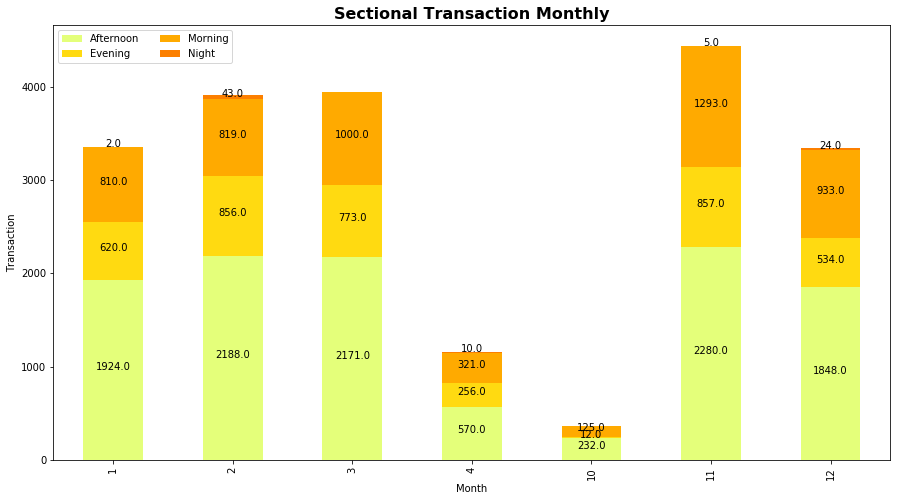

In [35]:
unstack_grouped.plot(kind='bar',
                     stacked=True,
                     colormap='Wistia',
                     figsize=(15,8))

plt.legend(loc="upper left", ncol=2)
plt.ylabel("Transaction")
plt.xlabel("Month")
plt.title("Sectional Transaction Monthly", fontsize=16,
                 fontweight="bold")

for n, x in enumerate([*unstack_grouped.index.values]):
    for (Transaction, count, y_loc) in zip(unstack_grouped.loc[x],
                                          unstack_grouped.loc[x],
                                          unstack_grouped.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - Transaction) + (Transaction / 2),
                 s=f'{count}', 
                 color="black",
                 ha='center',
                 fontsize=10,
                 fontweight="light")


plt.show()

In the barplot above we can see transactions at night at most in February. This is why tshirt and followed by postcards are the best-selling items in the evening session, certainly related to Valentine's Day. Besides that, we can see that the highest sales are in November because it is nearing Christmas and New Years.

## How was the sales daily?

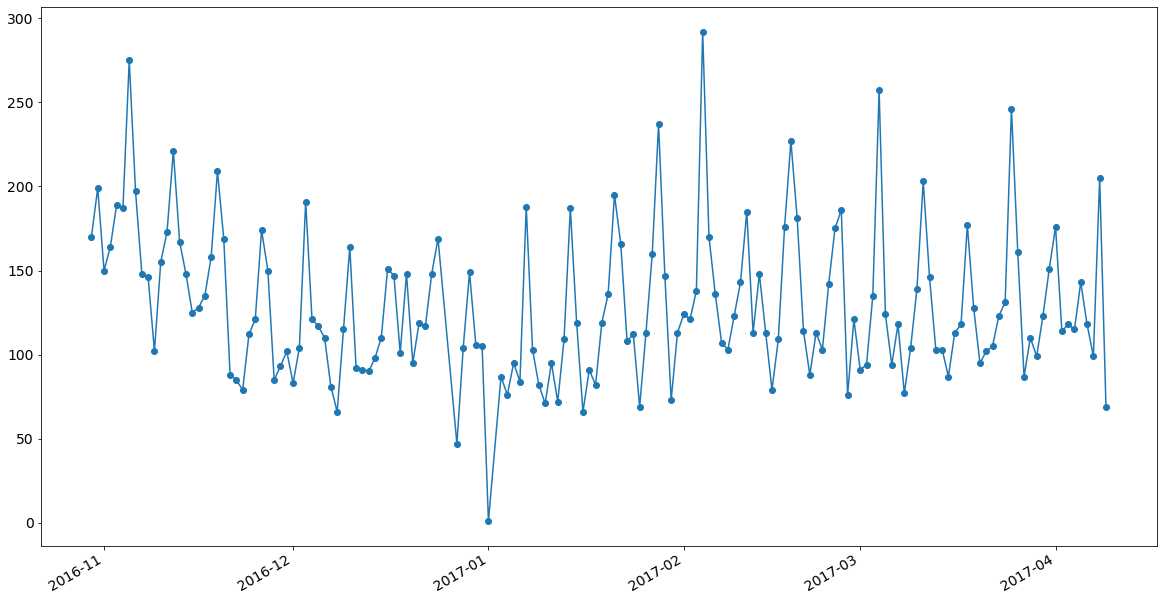

In [36]:
#Check the sales all of times
plt.figure(figsize=(20,11))
df['Date'].value_counts().plot(kind='line',marker='o',fontsize=14)

In [37]:
df['is_weekend'] = df['Day_name'].apply(lambda x: 'Weekend' if (x == 'Saturday' or x == 'Sunday') else 'Weekday')
df.sample(3)

Date                Time  Transaction            Item  \
20267 2017-04-01 2022-01-23 15:58:51         9226  Spanish Brunch   
6803  2016-12-16 2022-01-23 11:40:42         3256           Juice   
20711 2017-04-05 2022-01-23 13:35:05         9419    Chicken Stew   

       Date_of_month  Month   Day_name      Month_str  Hour    Section  \
20267              1      4   Saturday     04 (April)    15    Evening   
6803              16     12     Friday  12 (Desember)    11  Afternoon   
20711              5      4  Wednesday     04 (April)    13  Afternoon   

      is_weekend  
20267    Weekend  
6803     Weekday  
20711    Weekday

In [38]:
df['is_weekend'].value_counts()

Weekday    12806
Weekend     7700
Name: is_weekend, dtype: int64

In [39]:
df3 = pd.DataFrame({'is_weekend':['Weekday','Weekend'],
                    'Transaction' : [12806,7700]
                  })

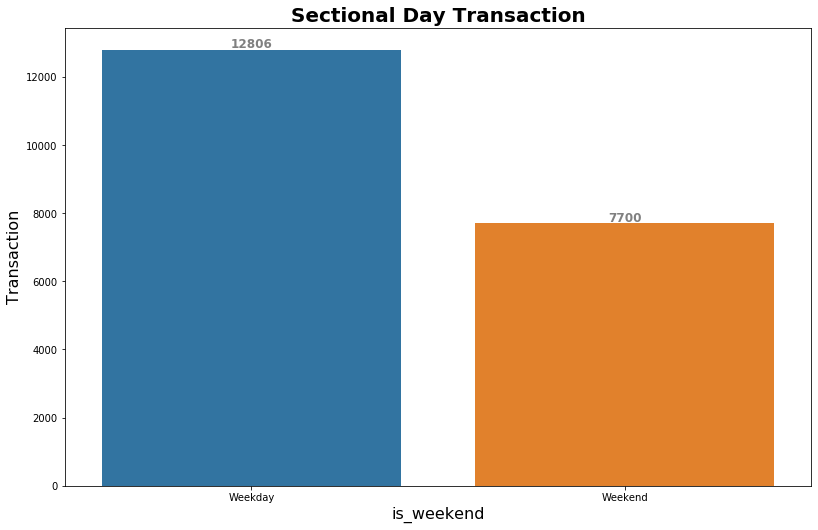

In [40]:
fig, ax = plt.subplots(figsize=(12,8))

g = sns.barplot(x = 'is_weekend',y='Transaction',data=df3,ax=ax)

x = np.arange(len(df['is_weekend']))
y = df3['Transaction']

for i, v in enumerate(y):
    ax.text(x[i], v+50, str(v), fontsize = 12, ha='center', color='gray', fontweight='bold')

ax.set_title('Sectional Day Transaction', fontsize=20, fontweight='bold')
ax.set_xlabel('is_weekend', fontsize=16, fontweight='normal')
ax.set_ylabel('Transaction', fontsize=16, fontweight='normal')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout(pad=3.0)

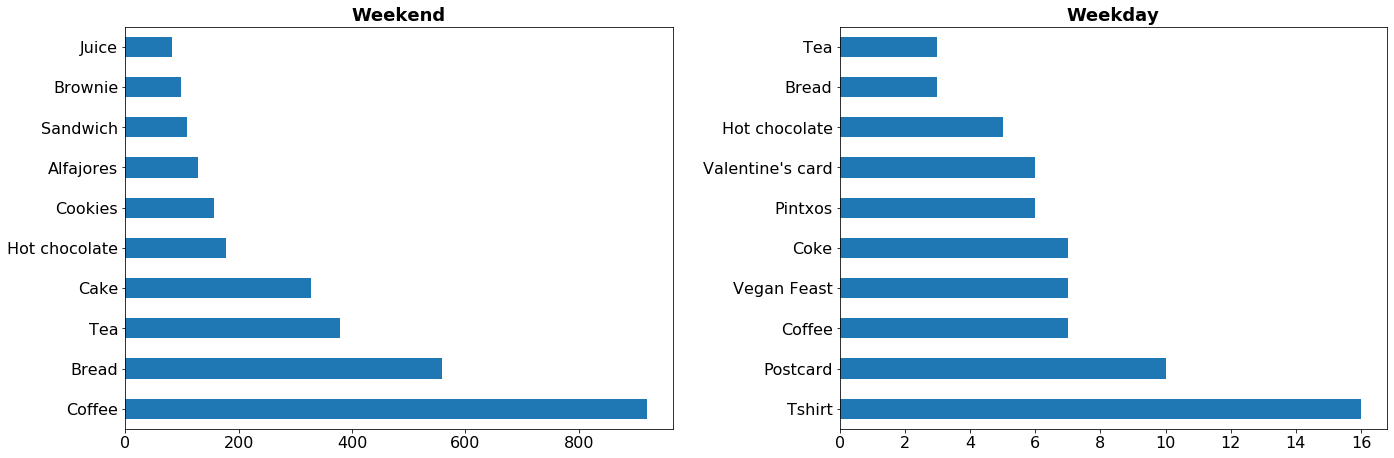

In [41]:
set_weekend = list(set(df['is_weekend']))
weekend=df[df['Section']==set_section[0]]
weekday=df[df['Section']==set_section[1]]

fig, ax = plt.subplots(1,2, figsize=(20,7))
weekend['Item'].value_counts()[:10].plot(kind='barh',fontsize=16,ax=ax[0])
weekday['Item'].value_counts()[:10].plot(kind='barh',fontsize=16,ax=ax[1])
ax[0].set_title('Weekend', fontsize=18, fontweight='bold')
ax[1].set_title('Weekday', fontsize=18, fontweight='bold')

fig.tight_layout(pad=3.0)

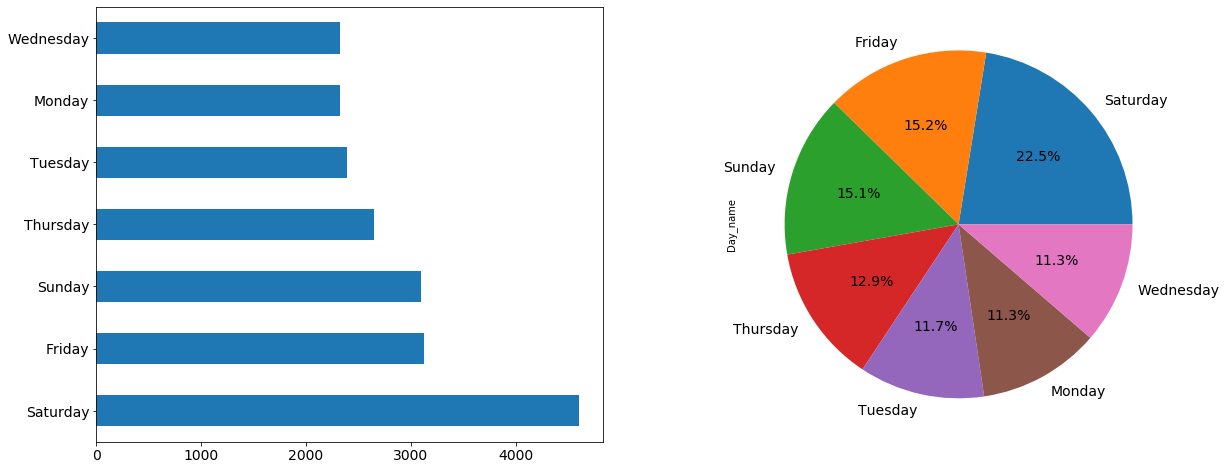

In [43]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

df['Day_name'].value_counts().plot(kind='barh',fontsize=14, ax=ax[0])
df['Day_name'].value_counts().plot(kind='pie',fontsize=14,autopct="%1.1f%%", ax=ax[1])


Saturday is the day of the most transactions, followed by Friday (one day before weekend) and Sunday.  

In [44]:
grouped1 = df.groupby(['Day_name'])['Section'].value_counts().round(0)
unstack_grouped1 = grouped1.unstack()
unstack_grouped1

Section    Afternoon  Evening  Morning  Night
Day_name                                     
Friday        1602.0    595.0    922.0    5.0
Monday        1254.0    454.0    616.0    NaN
Saturday      2441.0    864.0   1239.0   61.0
Sunday        2012.0    442.0    640.0    1.0
Thursday      1430.0    516.0    688.0   12.0
Tuesday       1293.0    502.0    594.0    3.0
Wednesday     1181.0    535.0    602.0    2.0

posx and posy should be finite values
posx and posy should be finite values


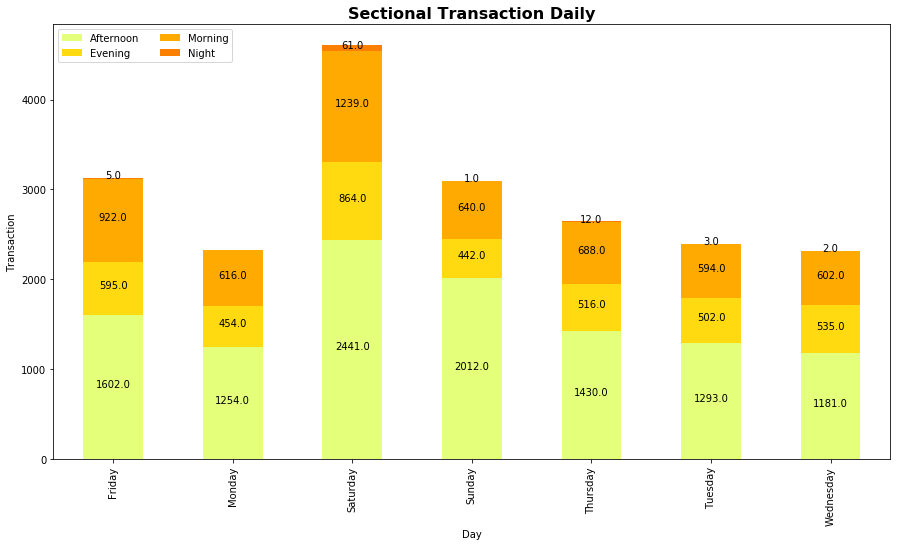

In [45]:
unstack_grouped1.plot(kind='bar',
                     stacked=True,
                     colormap='Wistia',
                     figsize=(15,8))

plt.legend(loc="upper left", ncol=2)
plt.ylabel("Transaction")
plt.xlabel("Day")
plt.title("Sectional Transaction Daily", fontsize=16,
                 fontweight="bold")

for n, x in enumerate([*unstack_grouped1.index.values]):
    for (Transaction, count, y_loc) in zip(unstack_grouped1.loc[x],
                                          unstack_grouped1.loc[x],
                                          unstack_grouped1.loc[x].cumsum()):
                
        plt.text(x=n,
                 y=(y_loc - Transaction) + (Transaction / 2),
                 s=f'{count}', 
                 color="black",
                 ha='center',
                 fontsize=10,
                 fontweight="light")


plt.show()

Transactions on Saturdays are mostly during the day, this means that visitors are enjoying a holiday with family or friends.

# Conclusion

1. The best-selling items are Coffee, bread, and tea throughout sales. But not in February. This is because it has to do with Valentine's Day.
2. Transactions throughout the most crowded sales occur on Saturdays, especially in the early hours of the day. 
3. Transactions during the most crowded sales occurred in November.
4. Preferably for some products in the bottom 10 position which only sold once or twice, there is no need to sell these products especially if the product has a short expiration date. Or can be sold with a preorder system.
5. Lunchtime is the busiest time of the year, peaking at 11 a.m. So if bakery employees work in shifts, the allocation of employees at lunch time should be more than dinner time.